<a href="https://colab.research.google.com/github/JordiPG05/Potafolio/blob/main/Retenci%C3%B3n_de_clientes_bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retención de clientes bancarios

Este proyecto trata de predecir en que casos los clientes se dan de baja de una entidad bancaria.

Teniendo en cuenta que como sabemos, es mucho más caro contratar a un nuevo cliente que mantener a uno existente.

Es ventajoso saber qué lleva a un cliente a tomar la decisión de abandonar la empresa.

La prevención de las bajas permite a las empresas desarrollar programas de fidelización y campañas de retención para conservar el mayor número posible de clientes.

## EDA de los datos

### **Importar librerias**

Para desarrollar este proyecto vamos a necesitar las siguientes librerías:
* pandas: Gestionar dataframes
* numpy: Calculos matemáticos
* matplotlib: Creación de gráficos
* seaborn: Creación de gráficos
* sklearn: Paquete que engloba gran parte del preprocesado de datos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

Cragamos el dataframe

In [16]:
data = pd.read_csv("/content/Customer-Churn-Records.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Comprobar las dimensiones del conjunto de datos

In [18]:
print("Número de filas:", data.shape[0])
print("Número de columnas:", data.shape[1])

Número de filas: 10000
Número de columnas: 18


Comprobar los tipos de datos de cada columna

In [19]:
print(data.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


Comprobar si faltan valores

In [20]:
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Resumen estadístico básico

In [21]:
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

### Data visualization

**Distribución de las bajas**

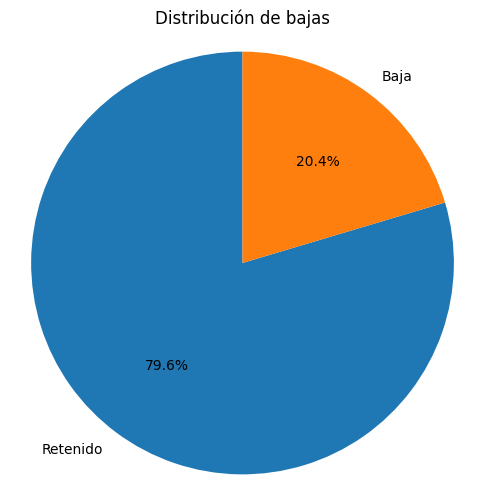

In [23]:
plt.figure(figsize=(6, 6))
churn_counts = data['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retenido', 'Baja'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de bajas')
plt.show()

**Bajas por género**

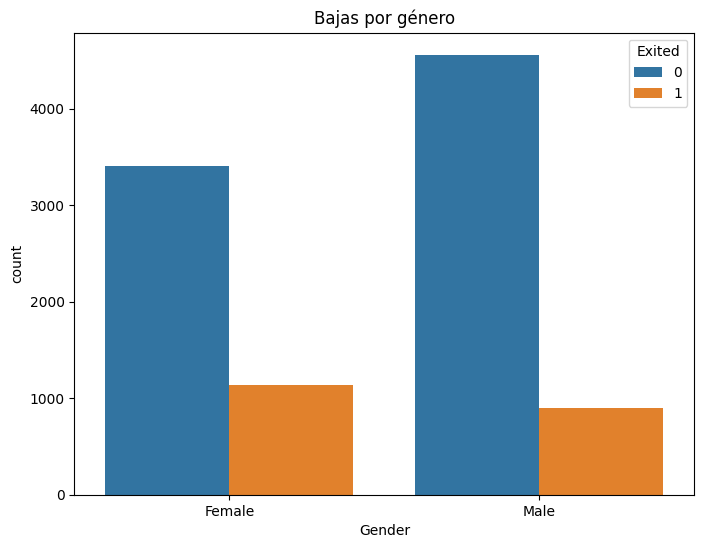

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Bajas por género')
plt.show()

churn_rate_gender = data.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Sobre la base de los datos proporcionados, la tasa de rotación por género es la siguiente:

* Mujeres: 25,1% 
* Hombres: 16,5%.


Hombres: 16,5% Esto significa que la tasa de abandono de clientes mujeres es mayor (25,1%) que la de los hombres (16,5%).

**Bajas por zonas geográficas**

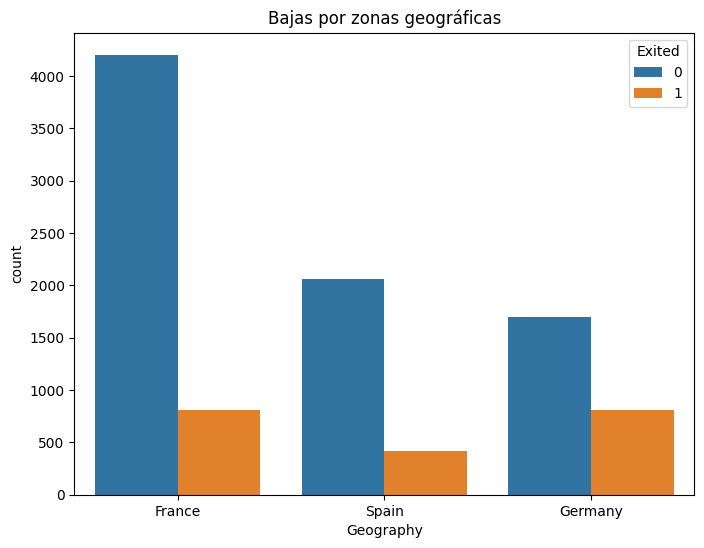

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Bajas por zonas geográficas')
plt.show()

churn_rate_geography = data.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Según los datos facilitados, la tasa de rotación por zonas geográficas es la siguiente:

* Francia: 16,2%.
* Alemania: 32,4%.
* España: 16,7% 

Esto indica que la tasa de bajas es más alta en Alemania (32,4%), seguida de España (16,7%) y Francia (16,2%).

**Bajas por grupos de edad**

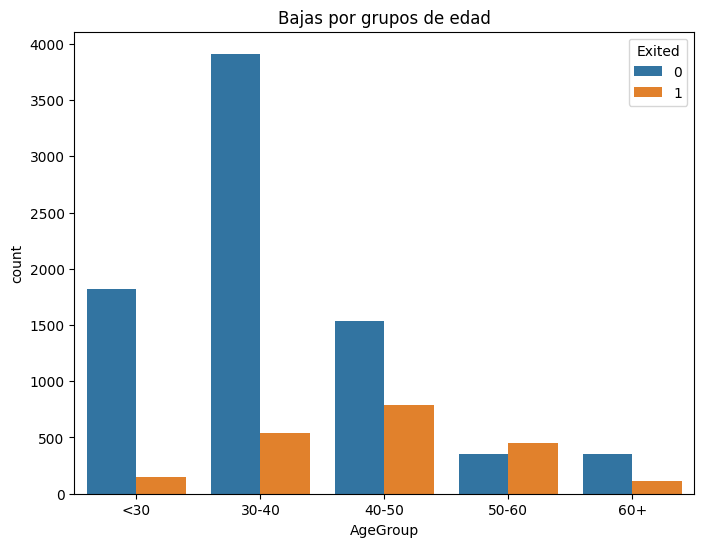

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


In [31]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=data)
plt.title('Bajas por grupos de edad')
plt.show()

churn_rate_age = data.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_age)

Según el conjunto de datos proporcionado, la tasa de rotación por grupos de edad es la siguiente:

* <30: 7.5%
* 30-40: 12.1%
* 40-50: 33.9%
* 50-60: 56.2%
* 60+: 24.8%





Estas tasas de rotación indican que la más alta se observa en el grupo de 50-60 años (56,2%), seguido del grupo de 40-50 años (33,9%). El porcentaje más bajo se observa en el grupo de edad <30 años (7,5%).

**Bajas por numéro de productos**

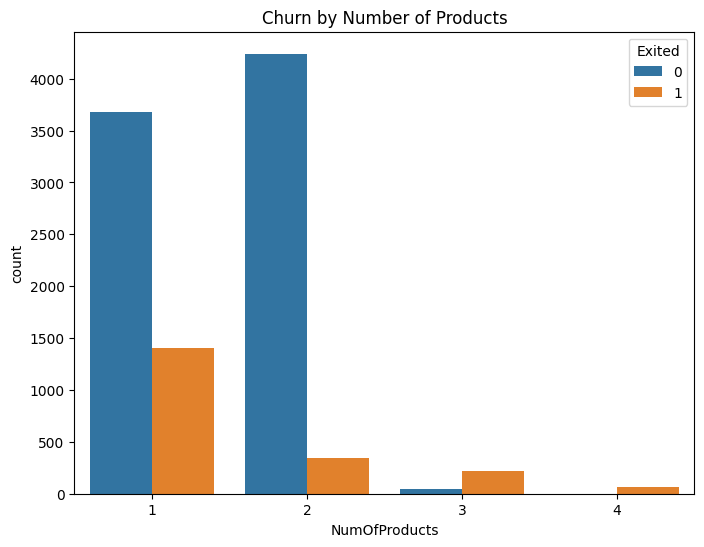

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

**Bajas por tarjeta de crédito**

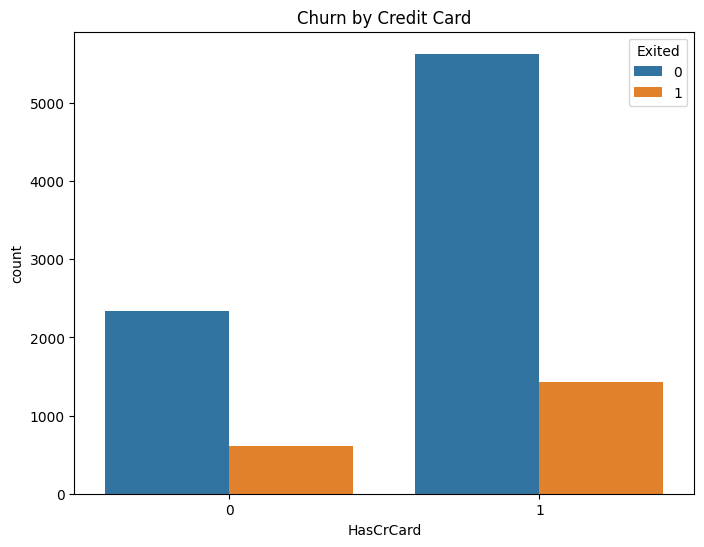

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Churn by Credit Card')
plt.show()

**Bajas por estado de actividad**

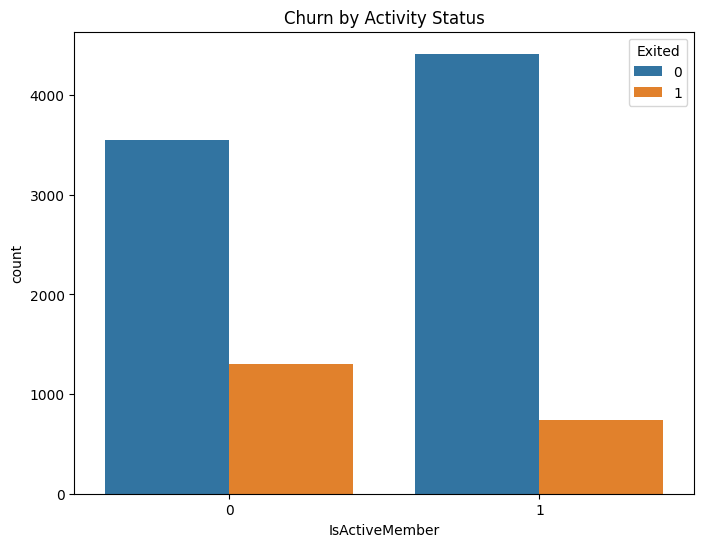

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn by Activity Status')
plt.show()

**Bajas por balance**

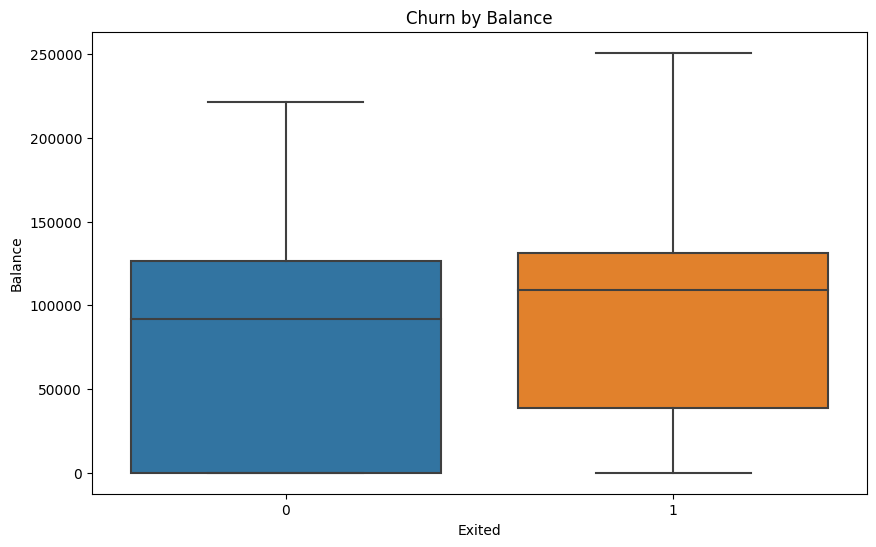

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn by Balance')
plt.show()

**Información obtenida sobre EDA**

1. *Género y bajas*:
La tasa de bajas es mayor entre las mujeres (25,1%) que entre los hombres (16,5%). Esto indica que el género puede influir en la pérdida de clientes, ya que las mujeres son más propensas a la baja.


2. *Geografía y bajas*:
La tasa de bajas varía de un país a otro. Alemania tiene la tasa de bajas más alta (32,4%), seguida de España (16,7%) y Francia (16,2%). Esto sugiere que la ubicación geográfica puede influir en la pérdida de clientes, ya que los clientes de determinados países son más propensos a la baja.

3. *Grupo de edad y bajas*:
El grupo de edad influye mucho en la tasa de bajas. La tasa de bajas más alta se observa en el grupo de 50-60 años (56,2%), seguido del grupo de 40-50 años (33,9%). La tasa de bajas más baja se observa en el grupo de edad <30 años (7,5%). Esto implica que los clientes de más edad son más propensos a la baja, mientras que los más jóvenes son más propensos a permanecer en el banco.

4. *Número de productos y bajas*:
El número de productos que tienen los clientes puede influir en la baja. Los clientes con menos productos pueden ser menos propensos a la baja, mientras que los que tienen más productos pueden tener una tasa de baja más alta. Se requiere un análisis más profundo para comprender la relación específica.

5. *Tarjeta de crédito y baja*:
Tener una tarjeta de crédito no parece tener un impacto significativo en la baja de clientes. La tasa de bajas es similar entre los clientes con y sin tarjeta de crédito. Por lo tanto, la posesión de una tarjeta de crédito por sí sola puede no ser un buen indicador de la baja.

6. *Estado de actividad y baja*:
El nivel de actividad de los clientes es otro factor importante. La tasa de bajas de los clientes activos es menor que la de los inactivos. Esto sugiere que los clientes comprometidos y activos tienen más probabilidades de permanecer en el banco.

7. *Saldo y baja*:
La distribución de los saldos de las cuentas no muestra una distinción clara entre los clientes que abandonan y los que permanecen en el banco. Es posible que sea necesario un análisis más detallado e ingeniería de características para explorar con más detalle la relación entre saldo y baja.

## Modelos predictivo y feature importance

#### **Poder predictivo de los datos**

* RowNumber - corresponde al número de registro (fila) y no tiene ningún efecto sobre la salida.
* CustomerId - contiene valores aleatorios y no tiene ningún efecto sobre la salida del cliente del banco.
* Surname - el apellido de un cliente no influye en su decisión de abandonar el banco.
* CreditScore - ctiene un efecto sobre la rotación de clientes, ya que es menos probable que un cliente con una puntuación crediticia más alta abandone el banco.
* Geography - la ubicación de un cliente puede afectar a su decisión de abandonar el banco.
* Gender - es interesante estudiar si el sexo influye en que un cliente abandone el banco.
* Age - esto es ciertamente relevante, ya que los clientes de más edad son menos propensos a abandonar su banco que los más jóvenes.
* Tenure - Se refiere al número de años que el cliente lleva siendo cliente del banco. Normalmente, los clientes más antiguos son más fieles y menos propensos a abandonar un banco.
* Balance - también es un buen indicador de la rotación de clientes, ya que las personas con un saldo más alto en sus cuentas tienen menos probabilidades de abandonar el banco en comparación con las que tienen saldos más bajos.
* NumOfProducts - se refiere al número de productos que un cliente ha comprado a través del banco.
* HasCrCard - indica si un cliente tiene o no tarjeta de crédito. Esta columna también es relevante, ya que es menos probable que las personas con tarjeta de crédito abandonen el banco.
* IsActiveMember — Es menos probable que los clientes activos abandonen el banco.
* EstimatedSalary — Al igual que ocurre con el equilibrio, las personas con salarios más bajos tienen más probabilidades de abandonar el banco en comparación con las que tienen salarios más altos.
* Exited — si el cliente abandonó o no el banco.
* Complain — cliente tiene queja o no.
* Satisfaction Score — Puntuación proporcionada por el cliente para la resolución de su reclamación.
* Card Type — tipo de tarjeta que posee el cliente.
* Points Earned — los puntos obtenidos por el cliente por utilizar la tarjeta de crédito.




### **Importar librerias**

Para desarrollar este proyecto vamos a necesitar las siguientes librerías:
* xgboost: Crear los modelos predictivos y obtener feature importance
* sklearn: Paquete que engloba gran parte del preprocesado de datos y evaluación de modelos


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Cargamos los datos en un dataframe

In [ ]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")

Eliminamos las columnas innecesarias para el modelo

In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

Visualizamos los 5 primeros datos (control del dataframe)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Transformamos las variables categóricas a numéricas.

En este caso, vamos a utilizar un ordinal encoder, aunque se pueden utilizar otras técnicas, como LabelEncoder.

In [ ]:
# Seleccionamos las variables categóricas
cat_cols = ["Geography", "Gender", "Card Type"]

# Inicializamos OrdinalEncoder
enc = OrdinalEncoder()

# Entrenamos el OrdinalEncoder
df[cat_cols] = enc.fit_transform(df[cat_cols])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


Ahora los datos son todos numéricos, ya tenemos el preprocesado completado.

Dividimos el dataframe completo en 2 partes, Train y Test.

* Train: Serán los datos utilizados para entrenar el modelo.
* Test: Serán los datos utilizados para evaluar el modelo una vez entrenado.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1), df["Exited"], test_size=0.20, random_state=42)

Con el split de los datos ejecutados, vamos y definir los parámetros de nuestro modelo predictivo.

In [ ]:
model = XGBClassifier(
    n_estimators=750,
    max_depth=4,
    learning_rate=0.01,
)

Me gustaría destacar que estos parámetros has sido previamente testeados mediante GridSearchCV en un notebook aparte.

Entrenamos el modelo con los datos de Train

In [ ]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="logloss",
    early_stopping_rounds=1000,
    verbose=100,
)

[0]	validation_0-logloss:0.68325


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-logloss:0.20332
[200]	validation_0-logloss:0.07321
[300]	validation_0-logloss:0.02957
[400]	validation_0-logloss:0.01424
[500]	validation_0-logloss:0.00897
[600]	validation_0-logloss:0.00730
[700]	validation_0-logloss:0.00691
[749]	validation_0-logloss:0.00690


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print(f"Best iteration: {model.best_iteration} - logloss: {model.best_score}")

Best iteration: 738 - logloss: 0.00689022985484917


Evaluamos el modelo con los datos de test

In [ ]:
# Realizamos las predicciones
y_pred = model.predict(X_test)

# Obtenemos el accuraccy score con los datos de test y las predicciones
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 99.90%


**Objetivo final**

Una vez tenemos el modelo entrenado y evaluado (99,90% de accuracy), es momento de sacar nuestras conclusiones.

Para ello visualizamos el modelo con feature importance, pudiendo ver qué factor afecta más al modelo y, por lo tanto, que factor hay que tener más en cuenta a la hora de predecir la baja de un cliente.
*Para obtener más detalle e información sobre feature importance, se pueden realizar gráficos SHAP, pudiendo ver el comportamiento en casos concretos.*

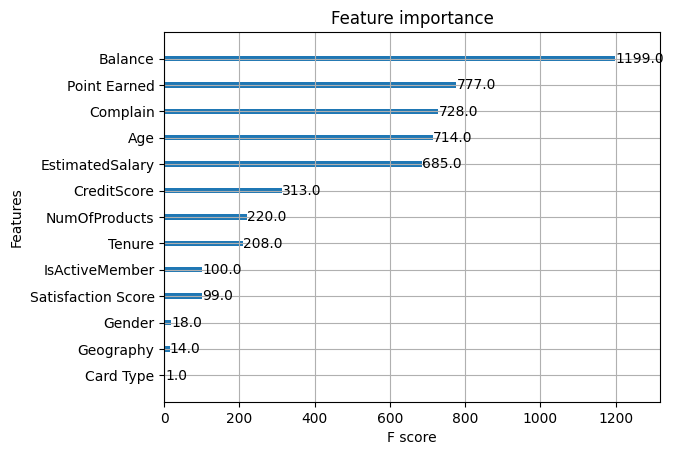

In [ ]:
xgb.plot_importance(model)
plt.show()

Como podemos observar, la variable 'Balance' es la más importante a tener en cuenta.
En segundo lugar, tenemos 'Point Earned' y muy de cerca, 'Complain','Age','EstimatedSalary'.
Como destacábamos al inicio del proyecto, nuestras sospechas eran correctas, la cantidad de dinero en la cuenta es un factor clave a tener en cuenta, esto se puede expresar de varias formas:

1. Dinero actual en la cuenta
2. Capacidad de ganar dinero

Por un lado, vemos que la edad es fundamental.
Contra mayor es la persona, más estabilidad financiera quiere, seguramente debido a que tiene más obligaciones económicas.

Por otro lado, las quejas tienen una gran repercusión en las bajas.

Similar a lo que pasa en las empresas de servicios telefónicos, tener problemas con los bancos supone un gran descontento en el usuario, pudiendo, si tener un buen servicio al cliente, suponer la baja.